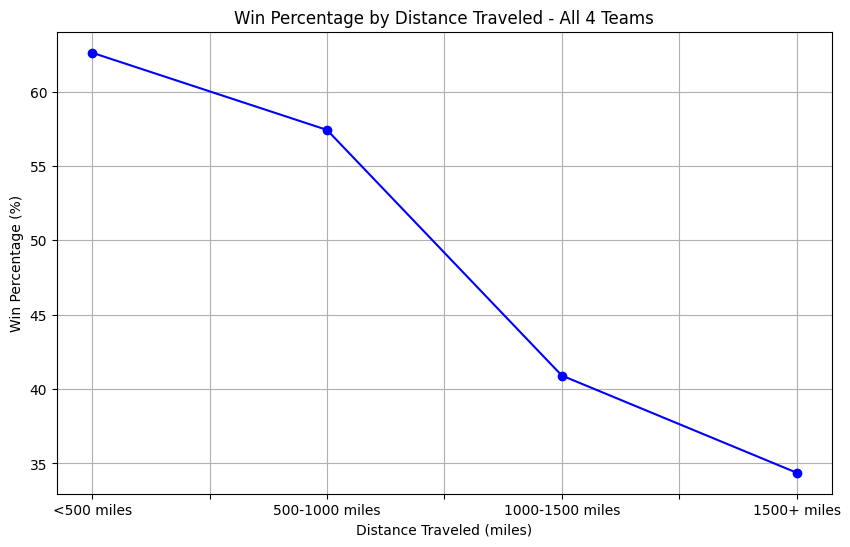

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2


import warnings
warnings.filterwarnings("ignore")


# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",
    database="",
    user="",
    password=""
)

# List of Big 10 opponents
big10_opponents = ["Michigan", "Ohio State", "Penn State", "Michigan State", "Iowa", "Indiana", 
                   "Rutgers", "Maryland", "Purdue", "Illinois", "Minnesota", "Nebraska", 
                   "Northwestern", "Wisconsin"]

# Query for UCLA
ucla_query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, rushing_att, rushing_yds, 
       rushing_avg, rushing_td, total_plays, total_yards, avg_yds, pass_first_downs, rush_first_downs,
       first_down_pens, total_first_downs, total_penalties, total_penalties_yds, total_fum, total_int, 
       total_to, result, distance_from
FROM UCLA_Offensive_Stats;
"""
ucla_data = pd.read_sql(ucla_query, conn)
ucla_data['team'] = 'UCLA'

# Query for USC
usc_query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, rushing_att, rushing_yds, 
       rushing_avg, rushing_td, total_plays, total_yards, avg_yds, pass_first_downs, rush_first_downs,
       first_down_pens, total_first_downs, total_penalties, total_penalties_yds, total_fum, total_int, 
       total_to, result, distance_from
FROM USC_Offensive_Stats;
"""
usc_data = pd.read_sql(usc_query, conn)
usc_data['team'] = 'USC'

# Query for Washington
washington_query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, rushing_att, rushing_yds, 
       rushing_avg, rushing_td, total_plays, total_yards, avg_yds, pass_first_downs, rush_first_downs,
       first_down_pens, total_first_downs, total_penalties, total_penalties_yds, total_fum, total_int, 
       total_to, result, distance_from
FROM Washington_Offensive_Stats;
"""
washington_data = pd.read_sql(washington_query, conn)
washington_data['team'] = 'Washington'

# Query for Oregon
oregon_query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, rushing_att, rushing_yds, 
       rushing_avg, rushing_td, total_plays, total_yards, avg_yds, pass_first_downs, rush_first_downs,
       first_down_pens, total_first_downs, total_penalties, total_penalties_yds, total_fum, total_int, 
       total_to, result, distance_from
FROM Oregon_Offensive_Stats;
"""
oregon_data = pd.read_sql(oregon_query, conn)
oregon_data['team'] = 'Oregon'

# Combine the data for all four teams
combined_data = pd.concat([ucla_data, usc_data, oregon_data, washington_data], ignore_index=True)

# Define the distance bins and labels
distance_bins = [0, 500, 1000, 1500, float('inf')]
distance_labels = ['<500 miles', '500-1000 miles', '1000-1500 miles', '1500+ miles']

# Create a column for distance range
combined_data['Distance_Range'] = pd.cut(combined_data['distance_from'], bins=distance_bins, labels=distance_labels)

# Create a column 'win' where a win is 1 and a loss is 0
combined_data['win'] = combined_data['result'].apply(lambda x: 1 if x.strip()[0] == 'W' else 0)

# Group by distance range and calculate the win percentage
win_percentage_by_distance = combined_data.groupby('Distance_Range')['win'].mean() * 100

# Plot
plt.figure(figsize=(10, 6))
win_percentage_by_distance.plot(kind='line', marker='o', color='blue')
plt.title('Win Percentage by Distance Traveled - All 4 Teams')
plt.xlabel('Distance Traveled (miles)')
plt.ylabel('Win Percentage (%)')
plt.grid(True)
plt.show()
